<a href="https://colab.research.google.com/github/kdeepthi123/496/blob/main/Deepthik_496MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print('Size to train dataset:',train_images.shape)
print('Size to train labels:',len(train_labels))
print('Train Labels:',train_labels)
print('Size to test dataset:',test_images.shape)
print('Size to test dataset:',test_images.shape)

Size to train dataset: (60000, 28, 28)
Size to train labels: 60000
Train Labels: [9 0 0 ... 3 0 5]
Size to test dataset: (10000, 28, 28)
Size to test dataset: (10000, 28, 28)


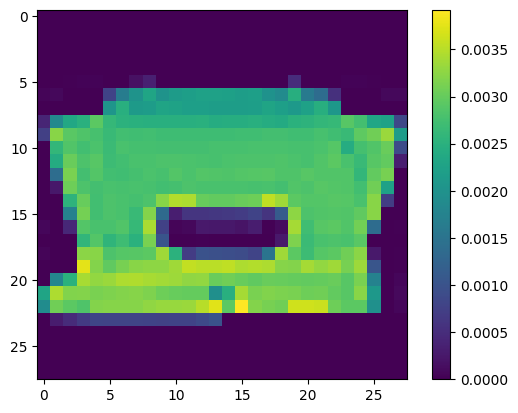

Bag


In [ ]:
plt.figure()
plt.imshow(train_images[999])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[train_labels[999]])

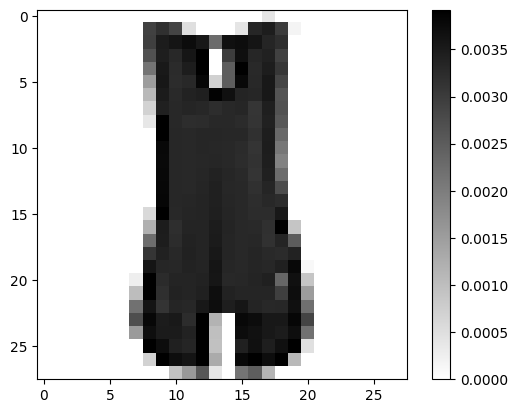

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

plt.figure()
plt.imshow(train_images[4],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
from keras.layers.rnn.base_conv_lstm import activations
from keras.layers import Dense,Flatten
#layer1-make it 1D-Flatten is used to convert multiD input to a 1D
#Dense- fully connected layer.where each neuron in the current layer is connected to every neuron in the previous layer
#layer2-make - values as 0 and + values as it is
#layer3-Softmax - gives a vector of probable values between 0-1 all together will be 1
#eg:0.41,0.01etc..... if 0.41 is high it teams 0-tshirt
myModel=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [ ]:
myModel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
myModel.fit(train_images,train_labels,epochs=10)
test_loss,test_acc=myModel.evaluate(test_images,test_labels,verbose=2)
print("test acc:",test_acc)
print("test loss",test_loss)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 1.0802 - accuracy: 0.6627
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.6402 - accuracy: 0.7694
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.5652 - accuracy: 0.7980
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5217 - accuracy: 0.8150
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4933 - accuracy: 0.8254
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4730 - accuracy: 0.8331
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4570 - accuracy: 0.8390
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4456 - accuracy: 0.8421
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4358 - accuracy: 0.8463
Epoch 10/10
1875/1875 [==============================] - 21s 11m

In [ ]:
predictions=myModel.predict(test_images)
np.argmax(predictions[9027])
print(predictions[9027])
print(np.argmax(predictions[9027]))


313/313 [==============================] - 1s 4ms/step
[3.8106550e-04 3.0797705e-04 2.8577349e-01 8.4712525e-04 5.6622839e-01
 1.7722137e-08 1.4517011e-01 2.4525762e-11 1.2919039e-03 2.1239138e-10]
4


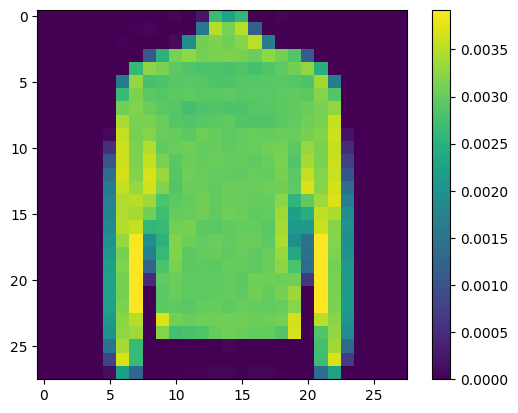

Pullover


In [ ]:
plt.figure()
plt.imshow(test_images[9027])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[test_labels[9027]])